<a href="https://colab.research.google.com/github/lidjud/Python-sem-23_1/blob/main/Pandas_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/lijumtzc/Pandas/master/master.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2642k  100 2642k    0     0  3250k      0 --:--:-- --:--:-- --:--:-- 3246k


In [9]:
!ls #Te permite ver el archivo

master.csv  sample_data


In [10]:
!head master.csv # Visulaizas parte de la información
#Resumen de las tasas de suicidio de 1985 a 2016
#Compara la información socioeconómica con las tasas de suicidio por año y país

﻿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year, gdp_for_year ($) ,gdp_per_capita ($),generation
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,,"2,156,624,900",796,Boomers
Albania,1987,female,75+ years,1,35600,2.81,Albania1987,,"2,156,624,900",796,G.I. Generation
Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,,"2,156,624,900",796,Silent
Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,,"2,156,624,900",796,Boomers
Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,,"2,156,624,900",796,G.I. Generation


In [56]:
import pandas as pd
import numpy as np
import os


df = (pd.read_csv(filepath_or_buffer=os.path.join('master.csv'))
      .rename(columns={'suicides/100k pop' : 'suicides_per_100k',
                       ' gdp_for_year ($) ' : 'gdp_year', 
                       'gdp_per_capita ($)' : 'gdp_capita',
                       'country-year' : 'country_year'})
      .assign(gdp_year=lambda _df: _df['gdp_year'].str.replace(',','').astype(np.int64))
     )

In [43]:
df

,country,year,sex,age,suicides_no,population,suicides_per_100k,country_year,HDI for year,gdp_year,gdp_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


In [17]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k', 'country_year', 'HDI for year', 'gdp_year',
       'gdp_capita', 'generation'],
      dtype='object')

In [18]:

df['generation'].unique() # Describe qué generaciones existen en la tabla

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [19]:
df['country'].nunique() # Número de países

101

In [20]:
df['country'].unique() # Describe los países

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [22]:
df['year'].unique() 

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

In [23]:
df['age'].unique() 

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [24]:
df.describe(include = 'all')

,country,year,sex,age,suicides_no,population,suicides_per_100k,country_year,HDI for year,gdp_year,gdp_capita,generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,8364.000000,2.782000e+04,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,NaN,NaN,6
top,Mauritius,NaN,male,15-24 years,NaN,NaN,NaN,Albania1987,NaN,NaN,NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,NaN,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,0.776601,4.455810e+11,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,0.093367,1.453610e+12,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,0.483000,4.691962e+07,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,0.713000,8.985353e+09,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,0.779000,4.811469e+10,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,0.855000,2.602024e+11,24874.000000,NaN


In [31]:
%%time
df.query('country == "Albania" and year == 1987 and sex == "male" and age == "25-34 years"')

CPU times: user 10.8 ms, sys: 0 ns, total: 10.8 ms
Wall time: 10.9 ms


,country,year,sex,age,suicides_no,population,suicides_per_100k,country_year,HDI for year,gdp_year,gdp_capita,generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [32]:
%%time
mi_df = df.set_index(['country', 'year', 'sex', 'age'])

CPU times: user 15.1 ms, sys: 840 µs, total: 15.9 ms
Wall time: 16.7 ms


In [29]:
mi_df

suicides_no  population  \
country    year sex    age                                    
Albania    1987 male   15-24 years           21      312900   
                       35-54 years           16      308000   
                female 15-24 years           14      289700   
                male   75+ years              1       21800   
                       25-34 years            9      274300   
...                                         ...         ...   
Uzbekistan 2014 female 35-54 years          107     3620833   
                       75+ years              9      348465   
                male   5-14 years            60     2762158   
                female 5-14 years            44     2631600   
                       55-74 years           21     1438935   

                                    suicides_per_100k    country_year  \
country    year sex    age                                              
Albania    1987 male   15-24 years               6.71     Albania1987   
                       35-54 years               5.19     Albania1987   
                female 15-24 years               4.83     Albania1987   
                male   75+ years                 4.59     Albania1987   
                       25-34 years               3.28     Albania1987   
...                                               ...             ...   
Uzbekistan 2014 female 35-54 years               2.96  Uzbekistan2014   
                       75+ years                 2.58  Uzbekistan2014   
                male   5-14 years                2.17  Uzbekistan2014   
                female 5-14 years                1.67  Uzbekistan2014   
                       55-74 years               1.46  Uzbekistan2014   

                                    HDI for year     gdp_year  gdp_capita  \
country    year sex    age                                                  
Albania    1987 male   15-24 years           NaN   2156624900         796   
                       35-54 years           NaN   2156624900         796   
                female 15-24 years           NaN   2156624900         796   
                male   75+ years             NaN   2156624900         796   
                       25-34 years           NaN   2156624900         796   
...                                          ...          ...         ...   
Uzbekistan 2014 female 35-54 years         0.675  63067077179        2309   
                       75+ years           0.675  63067077179        2309   
                male   5-14 years          0.675  63067077179        2309   
                female 5-14 years          0.675  63067077179        2309   
                       55-74 years         0.675  63067077179        2309   

                                         generation  
country    year sex    age                           
Albania    1987 male   15-24 years     Generation X  
                       35-54 years           Silent  
                female 15-24 years     Generation X  
                male   75+ years    G.I. Generation  
                       25-34 years          Boomers  
...                                             ...  
Uzbekistan 2014 female 35-54 years     Generation X  
                       75+ years             Silent  
                male   5-14 years      Generation Z  
                female 5-14 years      Generation Z  
                       55-74 years          Boomers  

[27820 rows x 8 columns]

In [33]:
%%time
mi_df.loc['Albania', 1987, 'male', '25-34 years']

CPU times: user 5.96 ms, sys: 0 ns, total: 5.96 ms
Wall time: 7.51 ms


suicides_no                    9
population                274300
suicides_per_100k           3.28
country_year         Albania1987
HDI for year                 NaN
gdp_year              2156624900
gdp_capita                   796
generation               Boomers
Name: (Albania, 1987, male, 25-34 years), dtype: object

In [34]:
%%time
mi_df.sort_index()

CPU times: user 13.2 ms, sys: 0 ns, total: 13.2 ms
Wall time: 22.1 ms


suicides_no  population  \
country    year sex    age                                    
Albania    1987 female 15-24 years           14      289700   
                       25-34 years            4      257200   
                       35-54 years            6      278800   
                       5-14 years             0      311000   
                       55-74 years            0      144600   
...                                         ...         ...   
Uzbekistan 2014 male   25-34 years          318     2739150   
                       35-54 years          519     3421300   
                       5-14 years            60     2762158   
                       55-74 years          144     1271111   
                       75+ years             17      224995   

                                    suicides_per_100k    country_year  \
country    year sex    age                                              
Albania    1987 female 15-24 years               4.83     Albania1987   
                       25-34 years               1.56     Albania1987   
                       35-54 years               2.15     Albania1987   
                       5-14 years                0.00     Albania1987   
                       55-74 years               0.00     Albania1987   
...                                               ...             ...   
Uzbekistan 2014 male   25-34 years              11.61  Uzbekistan2014   
                       35-54 years              15.17  Uzbekistan2014   
                       5-14 years                2.17  Uzbekistan2014   
                       55-74 years              11.33  Uzbekistan2014   
                       75+ years                 7.56  Uzbekistan2014   

                                    HDI for year     gdp_year  gdp_capita  \
country    year sex    age                                                  
Albania    1987 female 15-24 years           NaN   2156624900         796   
                       25-34 years           NaN   2156624900         796   
                       35-54 years           NaN   2156624900         796   
                       5-14 years            NaN   2156624900         796   
                       55-74 years           NaN   2156624900         796   
...                                          ...          ...         ...   
Uzbekistan 2014 male   25-34 years         0.675  63067077179        2309   
                       35-54 years         0.675  63067077179        2309   
                       5-14 years          0.675  63067077179        2309   
                       55-74 years         0.675  63067077179        2309   
                       75+ years           0.675  63067077179        2309   

                                         generation  
country    year sex    age                           
Albania    1987 female 15-24 years     Generation X  
                       25-34 years          Boomers  
                       35-54 years           Silent  
                       5-14 years      Generation X  
                       55-74 years  G.I. Generation  
...                                             ...  
Uzbekistan 2014 male   25-34 years       Millenials  
                       35-54 years     Generation X  
                       5-14 years      Generation Z  
                       55-74 years          Boomers  
                       75+ years             Silent  

[27820 rows x 8 columns]

In [44]:
(df
 .groupby(['country', 'year'])
 .agg({'suicides_per_100k': 'sum'})
 .rename(columns={'suicides_per_100k':'suicides_sum'})
 .sort_values('suicides_sum', ascending=False)
 .head(10)
)

suicides_sum
country            year              
Lithuania          1995        639.30
                   1996        595.61
Hungary            1991        575.00
Lithuania          2000        571.80
Hungary            1992        570.26
Lithuania          2001        568.98
Russian Federation 1994        567.64
Lithuania          1998        566.36
                   1997        565.44
                   1999        561.53

In [45]:
(mi_df
 .loc[('Switzerland', 2000)]
 .unstack('sex')
 [['suicides_no', 'population']]
)

suicides_no      population         
sex              female male     female     male
age                                             
15-24 years          20   79     410136   426957
25-34 years          47  147     537823   530378
35-54 years         124  360    1072711  1094229
5-14 years            1    4     412273   436831
55-74 years         128  239     723750   649009
75+ years            79  152     330903   184589

In [118]:
mex = (mi_df.loc['Mexico', 1995]
 .unstack('sex')
 [['suicides_no']]
)
mex = mex.loc[["15-24 years"]]

In [120]:
mex

suicides_no     
sex              female male
age                         
15-24 years         198  755

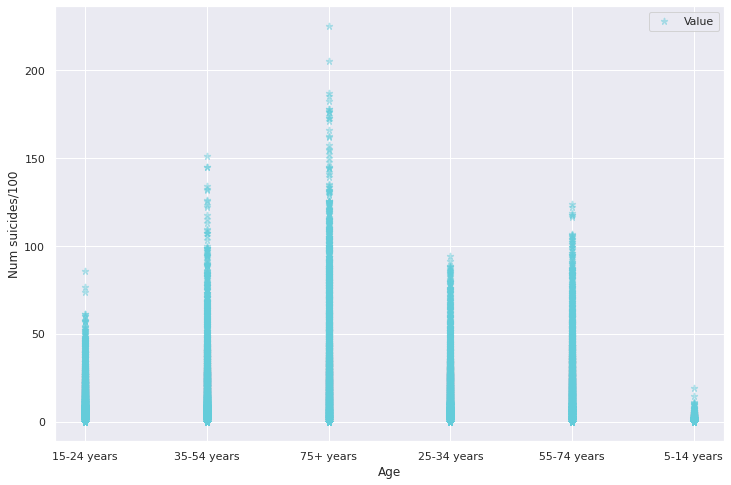

In [76]:
import matplotlib.pyplot as plt
x = df['age']
y = df['suicides_per_100k']
plt.figure(figsize=(12,8))

plt.scatter(x, y, c='#64ccda', alpha=0.5, marker=(5, 2),
            label='Value')
plt.xlabel("Age")
plt.ylabel("Num suicides/100")
plt.legend(loc='upper right')

In [ ]:
#